In [1]:
import tensorflow as tf

In [2]:
mnist=tf.keras.datasets.mnist


In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

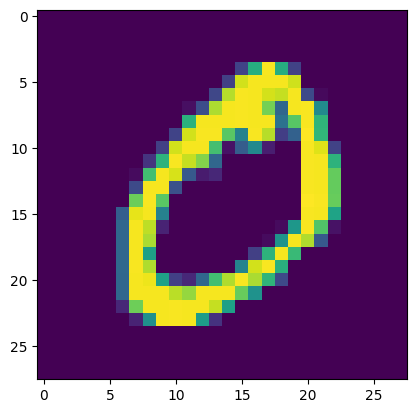

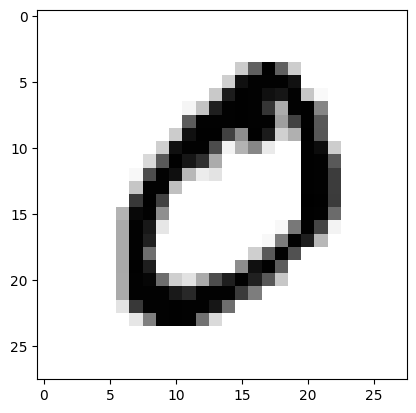

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
plt.show()
plt.imshow(x_train[1], cmap=plt.cm.binary)

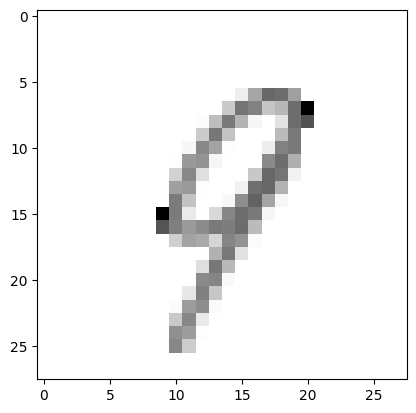

In [7]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[22], cmap=plt.cm.binary)

In [8]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(y_train[0])

5


In [10]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print(x_trainr.shape);
print(x_test.shape);

(60000, 28, 28, 1)
(10000, 28, 28)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import models,layers
from tensorflow.keras.layers import Activation,Flatten,MaxPooling2D,Dense,Dropout,Conv2D

In [12]:
class GatedConv2D(layers.Layer):
    def __init__(self, filters, kernel_size, activation='tanh', **kwargs):
        super(GatedConv2D, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.activation = activation
        
    def build(self, input_shape):
        self.conv_layer = layers.Conv2D(self.filters, self.kernel_size, padding='same', activation=self.activation)
        self.gate_layer = layers.Conv2D(self.filters, self.kernel_size, padding='same', activation='sigmoid')
    
    def call(self, inputs):
        conv_output = self.conv_layer(inputs)
        gate_output = self.gate_layer(inputs)
        gated_output = conv_output * gate_output
        return gated_output

In [13]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    GatedConv2D(128,(3,3),activation='sigmoid'),
#     layers.MaxPooling2D((2,2)),
    layers.TimeDistributed(layers.Flatten()),
    #layers.Bidirectional(layers.GRU(128, return_sequences=True)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [14]:
print("Total training samples",len(x_trainr))

Total training samples 60000


In [15]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [17]:
model.fit(x_trainr,y_train,epochs=3, validation_split=0.3)

Epoch 1/3
1313/1313 [==============================] - 39s 30ms/step - loss: 0.0777 - accuracy: 0.9762 - val_loss: 0.1132 - val_accuracy: 0.9668
Epoch 2/3
1313/1313 [==============================] - 39s 29ms/step - loss: 0.0600 - accuracy: 0.9814 - val_loss: 0.0706 - val_accuracy: 0.9793
Epoch 3/3
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0483 - accuracy: 0.9855 - val_loss: 0.0529 - val_accuracy: 0.9838


In [18]:
test_loss, test_acc=model.evaluate(x_testr,y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 0.0570 - accuracy: 0.9824
0.05700657516717911
0.9824000000953674


In [19]:
train_loss, train_acc=model.evaluate(x_trainr,y_train)
print(train_loss)
print(train_acc)

1875/1875 [==============================] - 19s 10ms/step - loss: 0.0341 - accuracy: 0.9898
0.03413413092494011
0.9898166656494141


In [20]:
prediction=model.predict([x_testr])

313/313 [==============================] - 3s 10ms/step


In [21]:
print(prediction)

[[1.7605289e-07 3.5693254e-05 3.2648284e-05 ... 9.9988675e-01
  9.5218138e-07 1.4299629e-05]
 [2.1809826e-04 1.0614809e-05 9.9957281e-01 ... 8.4259766e-05
  4.2845211e-05 2.5527599e-05]
 [2.3977057e-06 9.9992061e-01 1.7229794e-07 ... 2.2639415e-05
  6.8735098e-06 1.9642423e-06]
 ...
 [1.2442869e-07 6.0934522e-06 1.9264046e-07 ... 3.0629712e-05
  2.6148433e-05 7.9261290e-06]
 [7.9861326e-05 3.7690857e-06 2.3413824e-07 ... 2.4273405e-07
  2.2709740e-03 3.3519540e-05]
 [1.6154761e-04 7.1773627e-08 3.0870840e-06 ... 6.8426949e-08
  7.2824310e-05 4.0403870e-06]]


In [25]:
print(np.argmax(prediction[20]))

9


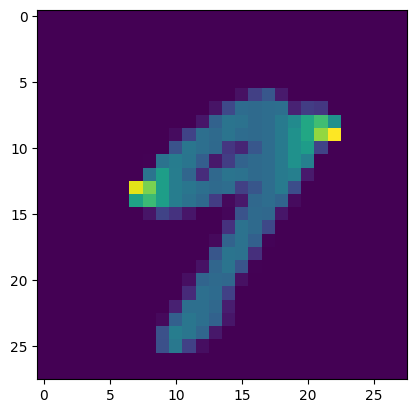

In [26]:
plt.imshow(x_test[20])

In [27]:
import cv2

In [43]:
img=cv2.imread('D:/CLG/SEM7/DIGITRECOGONITION/NUMBERS Dataset/testSample/img_332.jpg')

In [44]:
img.shape

(28, 28, 3)

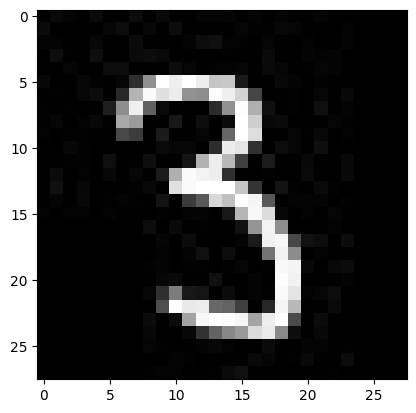

In [45]:
plt.imshow(img)

In [46]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [47]:
img.shape

(28, 28, 3)

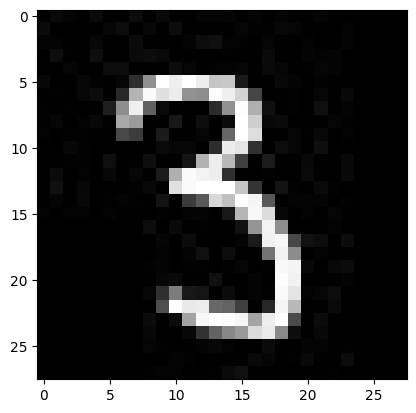

In [48]:
plt.imshow(img)

In [49]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [50]:
resized.shape

(28, 28)

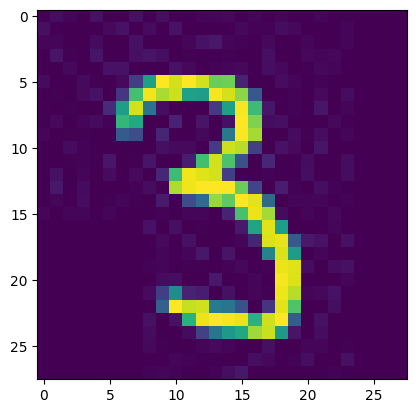

In [51]:
plt.imshow(resized)

In [52]:
newimg=tf.keras.utils.normalize(resized,axis=1)

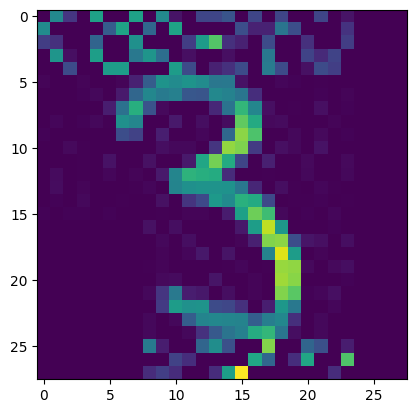

In [53]:
plt.imshow(newimg)

In [54]:
newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [55]:
newimg.shape

(1, 28, 28, 1)

In [56]:
predictions=model.predict(newimg)

1/1 [==============================] - 0s 54ms/step


In [57]:

print(np.argmax(predictions))

3


In [56]:
model.save('mnist_digit_recognition_model.h5')
loaded_model = tf.keras.utils.custom_object_scope('mnist_digit_recognition_model.h5')

1/1 [==============================] - 0s 19ms/step
Predicted Digit: 1


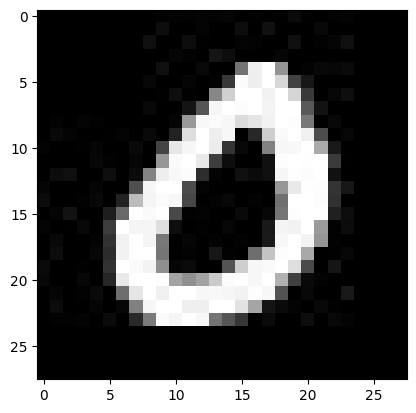

In [40]:
# import tensorflow as tf
# import cv2
# import numpy as np

# # Load your trained model
# model.save('mnist_digit_recognition_model.h5')
# loaded_model = tf.keras.utils.custom_object_scope('mnist_digit_recognition_model.h5')



# # Load and preprocess the new image
# img = cv2.imread('D:/CLG/SEM7/DIGITRECOGONITION/NUMBERS Dataset/testSample/img_346.jpg')
# plt.imshow(img)

# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)

# # Normalize the new image
# newimg = tf.keras.utils.normalize(resized, axis=1)
# newimg = np.array(newimg).reshape(-1, 28, 28, 1)

# # Make predictions on the new image
# predictions = model.predict(newimg)
# predicted_digit = np.argmin(predictions)

# print(f'Predicted Digit: {predicted_digit}')


9
